<center><img src="https://pbs.twimg.com/media/FommiJ9WIAEBPI0.jpg" width="500" /></center>
    
 <center> 

# Fase local
## Prediccion - Equipo **Malbecs**

</center>

**Integrantes**

- Denis Trosman
- Vito Stamatti
- Sumit Kumar Jethani Jethani

# Contenido

El presente notebook se estructura de la siguiente manera

1. Preproceso UH_2023_TRAIN.txt 
2. Ingenieria de Variables de UH_2023_TRAIN.txt
3. Preproceso DATOS_ETO.txt
4. Ingenieria de Variablesde DATOS_ETO.txt
5. Ingenieria de Variables de DATOS_METEO.txt
6. Entrenamiento y Validacion
7. Prediccion Final

# 1. Preproceso UH_2023_TRAIN.txt

In [6]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  


from malbecs.preprocess import wine as wine_pr
from malbecs.feateng import wine as wine_fe

seed = 99
raw_wine_path = "../data/raw/UH_2023_TRAIN.txt"
pro_wine_path = "../data/processed/wine_pro.csv" 
final_wine_path = "../data/final/wine_final.csv" 

In [7]:
# carga de datos
wine_data = wine_pr.load_wine_dataset(raw_wine_path)
wine_data.sample(5, random_state=seed)

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
199,14,46560,845,16,625-670,68,1,0,0,0.00,5342.40
7325,20,77964,123,19,500-530,87,1,0,0,0.31,1715.00
2646,16,55497,417,18,660-680,59,1,0,1,0.00,19620.00
8255,21,95959,299,12,440-450,17,1,0,1,0.55,797.88
1051,14,60871,47,19,520-540,81,2,0,1,0.00,18340.00


In [8]:
# cambio de nombre de columnas solo por practicidad
wine_data = wine_pr.norm_columns(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion
199,14,46560,845,16,625-670,68,1,0,0,0.00,5342.40
7325,20,77964,123,19,500-530,87,1,0,0,0.31,1715.00
2646,16,55497,417,18,660-680,59,1,0,1,0.00,19620.00
8255,21,95959,299,12,440-450,17,1,0,1,0.55,797.88
1051,14,60871,47,19,520-540,81,2,0,1,0.00,18340.00


Conversion de altitud en formato texto a formato numerico. Se utiliza el promedio de altitudes en el caso de haber 2 valores presentes

In [9]:
wine_data = wine_pr.process_altitud(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion
199,14,46560,845,16,647.50,68,1,0,0,0.00,5342.40
7325,20,77964,123,19,515.00,87,1,0,0,0.31,1715.00
2646,16,55497,417,18,670.00,59,1,0,1,0.00,19620.00
8255,21,95959,299,12,445.00,17,1,0,1,0.55,797.88
1051,14,60871,47,19,530.00,81,2,0,1,0.00,18340.00


Reemplazamos valores en 0 por nulos para ser imputados posteriormente

In [10]:

wine_data = wine_pr.replace_zeros_with_na(wine_data, cols=['superficie','altitud'])
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion
199,14,46560,845,16,647.50,68,1,0,0,NaN,5342.40
7325,20,77964,123,19,515.00,87,1,0,0,0.31,1715.00
2646,16,55497,417,18,670.00,59,1,0,1,NaN,19620.00
8255,21,95959,299,12,445.00,17,1,0,1,0.55,797.88
1051,14,60871,47,19,530.00,81,2,0,1,NaN,18340.00


Imputacion de altitud promedio por estacion

In [11]:
wine_data = wine_pr.fillna_by_group(wine_data, cols = ['altitud'], group = ['id_estacion'])
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion
199,14,46560,845,16,647.50,68,1,0,0,NaN,5342.40
7325,20,77964,123,19,515.00,87,1,0,0,0.31,1715.00
2646,16,55497,417,18,670.00,59,1,0,1,NaN,19620.00
8255,21,95959,299,12,445.00,17,1,0,1,0.55,797.88
1051,14,60871,47,19,530.00,81,2,0,1,NaN,18340.00


Imputacion jerarquica de superficie por agrupada por diferentes niveles de agregacion.

In [12]:
wine_data = wine_pr.fillna_by_group(wine_data,cols=['superficie'], group=['id_finca','variedad','modo'])
wine_data = wine_pr.fillna_by_group(wine_data,cols=['superficie'], group=['id_zona','variedad','modo'])
wine_data = wine_pr.fillna_by_group(wine_data,cols=['superficie'], group=['id_estacion','variedad','modo'])
wine_data = wine_pr.fillna_by_group(wine_data,cols=['superficie'], group=['variedad','modo'])
wine_data = wine_pr.fillna_by_group(wine_data,cols=['superficie'], group=['variedad'])
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion
199,14,46560,845,16,647.50,68,1,0,0,1.96,5342.40
7325,20,77964,123,19,515.00,87,1,0,0,0.31,1715.00
2646,16,55497,417,18,670.00,59,1,0,1,6.72,19620.00
8255,21,95959,299,12,445.00,17,1,0,1,0.55,797.88
1051,14,60871,47,19,530.00,81,2,0,1,4.44,18340.00


# 2. Ingenieria de Variables UH_2023_TRAIN.txt

Variable de superficie total de una finca para una campana. Se incorpora una nueva variable:

- sup_tot_camp_finca

In [13]:

wine_data = wine_fe.get_sup_tot_camp_finca(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca
199,14,46560,845,16,647.50,68,1,0,0,1.96,5342.40,1.96
7325,20,77964,123,19,515.00,87,1,0,0,0.31,1715.00,0.31
2646,16,55497,417,18,670.00,59,1,0,1,6.72,19620.00,6.72
8255,21,95959,299,12,445.00,17,1,0,1,0.55,797.88,0.55
1051,14,60871,47,19,530.00,81,2,0,1,4.44,18340.00,20.76


Variable de superficie promedio total de una finca para una campana. Se incorpora una nueva variable:

- superficie_total

In [14]:
# la superficie total promedio de la finca
wine_data = wine_fe.get_sup_tot_finca(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total
199,14,46560,845,16,647.50,68,1,0,0,1.96,5342.40,1.96,1.96
7325,20,77964,123,19,515.00,87,1,0,0,0.31,1715.00,0.31,0.31
2646,16,55497,417,18,670.00,59,1,0,1,6.72,19620.00,6.72,6.72
8255,21,95959,299,12,445.00,17,1,0,1,0.55,797.88,0.55,2.21
1051,14,60871,47,19,530.00,81,2,0,1,4.44,18340.00,20.76,20.84


Variable de cantidad de variedades diferentes cultivadas en una campana por cada finca. Se incorpora una nueva variable:

- n_var_camp_finca

In [15]:
wine_data = wine_fe.get_n_var_finca_camp(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca
199,14,46560,845,16,647.50,68,1,0,0,1.96,5342.40,1.96,1.96,1
7325,20,77964,123,19,515.00,87,1,0,0,0.31,1715.00,0.31,0.31,1
2646,16,55497,417,18,670.00,59,1,0,1,6.72,19620.00,6.72,6.72,1
8255,21,95959,299,12,445.00,17,1,0,1,0.55,797.88,0.55,2.21,1
1051,14,60871,47,19,530.00,81,2,0,1,4.44,18340.00,20.76,20.84,2


Variable de produccion de la campana anterior y de 2 campanas anteriores. Se incorporan dos nuevas variables:

- prod_shift1
- prod_shift2

In [16]:
wine_data = wine_fe.get_shifted_production(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2
199,14,46560,845,16,647.50,68,1,0,0,1.96,5342.40,1.96,1.96,1,-1.00,-1.00
7325,20,77964,123,19,515.00,87,1,0,0,0.31,1715.00,0.31,0.31,1,1053.50,1137.50
2646,16,55497,417,18,670.00,59,1,0,1,6.72,19620.00,6.72,6.72,1,20220.00,13620.00
8255,21,95959,299,12,445.00,17,1,0,1,0.55,797.88,0.55,2.21,1,1040.00,3140.00
1051,14,60871,47,19,530.00,81,2,0,1,4.44,18340.00,20.76,20.84,2,-1.00,-1.00


Variable de superficie de la campana anterior y de 2 campanas anteriores. Se incorporan dos nuevas variables:

- sup_shift1
- sup_shift2

In [17]:
# superficie de la campana anterior
wine_data = wine_fe.get_shifted_superficie(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2
199,14,46560,845,16,647.50,68,1,0,0,1.96,5342.40,1.96,1.96,1,-1.00,-1.00,-1.00,-1.00
7325,20,77964,123,19,515.00,87,1,0,0,0.31,1715.00,0.31,0.31,1,1053.50,1137.50,0.31,0.31
2646,16,55497,417,18,670.00,59,1,0,1,6.72,19620.00,6.72,6.72,1,20220.00,13620.00,6.72,6.72
8255,21,95959,299,12,445.00,17,1,0,1,0.55,797.88,0.55,2.21,1,1040.00,3140.00,0.55,0.55
1051,14,60871,47,19,530.00,81,2,0,1,4.44,18340.00,20.76,20.84,2,-1.00,-1.00,-1.00,-1.00


Variables de cambio entre produccion anterior y produccion de hace 2 campanas. Se generan 4 nuevas variables: 

- prod_shift1_gt_shift2: representa un cambio positivo en la produccion
- prod_shift_max: el maximo de las producciones del periodo pasado y del anterior.
- prod_shift_change: diferencia de producciones de los periodos anteriores
- prod_shift_avg: produccion promedio de los dos periodos anteriores.

In [18]:
wine_data = wine_fe.get_production_changes(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg
199,14,46560,845,16,647.50,68,1,0,0,1.96,5342.40,1.96,1.96,1,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00
7325,20,77964,123,19,515.00,87,1,0,0,0.31,1715.00,0.31,0.31,1,1053.50,1137.50,0.31,0.31,0,1137.50,-84.00,1095.50
2646,16,55497,417,18,670.00,59,1,0,1,6.72,19620.00,6.72,6.72,1,20220.00,13620.00,6.72,6.72,1,20220.00,6600.00,16920.00
8255,21,95959,299,12,445.00,17,1,0,1,0.55,797.88,0.55,2.21,1,1040.00,3140.00,0.55,0.55,0,3140.00,-2100.00,2090.00
1051,14,60871,47,19,530.00,81,2,0,1,4.44,18340.00,20.76,20.84,2,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00


Variable de cambio de produccion a nivel estacion entre la campana anterior y la de dos periodos previos. Se generas una nueva variable:

- prod_est_mean_change

In [19]:
wine_data = wine_fe.get_production_change_by_estacion(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change
199,14,46560,845,16,647.50,68,1,0,0,1.96,5342.40,1.96,1.96,1,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00
7325,20,77964,123,19,515.00,87,1,0,0,0.31,1715.00,0.31,0.31,1,1053.50,1137.50,0.31,0.31,0,1137.50,-84.00,1095.50,0.30
2646,16,55497,417,18,670.00,59,1,0,1,6.72,19620.00,6.72,6.72,1,20220.00,13620.00,6.72,6.72,1,20220.00,6600.00,16920.00,0.71
8255,21,95959,299,12,445.00,17,1,0,1,0.55,797.88,0.55,2.21,1,1040.00,3140.00,0.55,0.55,0,3140.00,-2100.00,2090.00,0.51
1051,14,60871,47,19,530.00,81,2,0,1,4.44,18340.00,20.76,20.84,2,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00


Variable de produccion por hectarea de la campana anterior y de 2 campanas anteriores. Se incorporan dos nuevas variables:

- prod_he_shift1
- prod_he_shift2

In [20]:
wine_data = wine_fe.get_shifted_production_he(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2
199,14,46560,845,16,647.50,68,1,0,0,1.96,5342.40,1.96,1.96,1,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00,-1.00,-1.00
7325,20,77964,123,19,515.00,87,1,0,0,0.31,1715.00,0.31,0.31,1,1053.50,1137.50,0.31,0.31,0,1137.50,-84.00,1095.50,0.30,3438.32,3712.47
2646,16,55497,417,18,670.00,59,1,0,1,6.72,19620.00,6.72,6.72,1,20220.00,13620.00,6.72,6.72,1,20220.00,6600.00,16920.00,0.71,3007.76,2026.00
8255,21,95959,299,12,445.00,17,1,0,1,0.55,797.88,0.55,2.21,1,1040.00,3140.00,0.55,0.55,0,3140.00,-2100.00,2090.00,0.51,1888.85,5702.87
1051,14,60871,47,19,530.00,81,2,0,1,4.44,18340.00,20.76,20.84,2,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00,-1.00,-1.00


Variables de cambio entre produccion por hectarea anterior y produccion por hectarea de hace 2 campanas. Se generan 2 nuevas variables: 

- prod_he_shift_change: diferencia de producciones de los periodos anteriores
- prod_he_shift_avg: produccion promedio de los dos periodos anteriores.

In [21]:
wine_data = wine_fe.get_shifted_production_he_changes(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2,prod_he_shift_change,prod_he_shift_avg
199,14,46560,845,16,647.50,68,1,0,0,1.96,5342.40,1.96,1.96,1,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00,-1.00,-1.00,0.00,-1.00
7325,20,77964,123,19,515.00,87,1,0,0,0.31,1715.00,0.31,0.31,1,1053.50,1137.50,0.31,0.31,0,1137.50,-84.00,1095.50,0.30,3438.32,3712.47,-274.15,3575.39
2646,16,55497,417,18,670.00,59,1,0,1,6.72,19620.00,6.72,6.72,1,20220.00,13620.00,6.72,6.72,1,20220.00,6600.00,16920.00,0.71,3007.76,2026.00,981.76,2516.88
8255,21,95959,299,12,445.00,17,1,0,1,0.55,797.88,0.55,2.21,1,1040.00,3140.00,0.55,0.55,0,3140.00,-2100.00,2090.00,0.51,1888.85,5702.87,-3814.02,3795.86
1051,14,60871,47,19,530.00,81,2,0,1,4.44,18340.00,20.76,20.84,2,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00,-1.00,-1.00,0.00,-1.00


Variables de produccion por hectarea promedio para las diferentes variedades y modos y zonas. Se generan dos nuevas variables  

- prod_he_var_zone_mean_hist: produccion promedio por hectarea para una variedad, modo y zona, tomando en cuenta todas las campanas previas a la actual.
- prod_he_var_zone_std_hist: desvio estandard de produccion por hectarea para una variedad, modo y zona, tomando en cuenta todas las campanas previas a la actual.

In [22]:
wine_data = wine_fe.get_historic_prod_he_by_var_and_zone(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2,prod_he_shift_change,prod_he_shift_avg,prod_he_var_zone_mean_hist,prod_he_var_zone_std_hist
199,14,46560,845,16,647.50,68,1,0,0,1.96,5342.40,1.96,1.96,1,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00,-1.00,-1.00,0.00,-1.00,-1.00,-1.00
7325,20,77964,123,19,515.00,87,1,0,0,0.31,1715.00,0.31,0.31,1,1053.50,1137.50,0.31,0.31,0,1137.50,-84.00,1095.50,0.30,3438.32,3712.47,-274.15,3575.39,2799.93,1515.04
2646,16,55497,417,18,670.00,59,1,0,1,6.72,19620.00,6.72,6.72,1,20220.00,13620.00,6.72,6.72,1,20220.00,6600.00,16920.00,0.71,3007.76,2026.00,981.76,2516.88,1790.27,1799.62
8255,21,95959,299,12,445.00,17,1,0,1,0.55,797.88,0.55,2.21,1,1040.00,3140.00,0.55,0.55,0,3140.00,-2100.00,2090.00,0.51,1888.85,5702.87,-3814.02,3795.86,1254.86,1735.85
1051,14,60871,47,19,530.00,81,2,0,1,4.44,18340.00,20.76,20.84,2,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00,-1.00,-1.00,0.00,-1.00,-1.00,-1.00


Variables de produccion por hectarea promedio para las diferentes variedades y modos. Se generan dos nuevas variables  

- prod_he_var_mean_hist: produccion promedio por hectarea para una variedad, modo , tomando en cuenta todas las campanas previas a la actual.
- prod_he_var_std_hist: desvio estandard de produccion por hectarea para una variedad, modo, tomando en cuenta todas las campanas previas a la actual.

In [23]:
wine_data = wine_fe.get_historic_prod_he_by_var(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2,prod_he_shift_change,prod_he_shift_avg,prod_he_var_zone_mean_hist,prod_he_var_zone_std_hist,prod_he_var_mean_hist,prod_he_var_std_hist
199,14,46560,845,16,647.50,68,1,0,0,1.96,5342.40,1.96,1.96,1,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00,-1.00,-1.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00
7325,20,77964,123,19,515.00,87,1,0,0,0.31,1715.00,0.31,0.31,1,1053.50,1137.50,0.31,0.31,0,1137.50,-84.00,1095.50,0.30,3438.32,3712.47,-274.15,3575.39,2799.93,1515.04,4404.09,4770.45
2646,16,55497,417,18,670.00,59,1,0,1,6.72,19620.00,6.72,6.72,1,20220.00,13620.00,6.72,6.72,1,20220.00,6600.00,16920.00,0.71,3007.76,2026.00,981.76,2516.88,1790.27,1799.62,2679.88,4600.19
8255,21,95959,299,12,445.00,17,1,0,1,0.55,797.88,0.55,2.21,1,1040.00,3140.00,0.55,0.55,0,3140.00,-2100.00,2090.00,0.51,1888.85,5702.87,-3814.02,3795.86,1254.86,1735.85,3069.25,4095.23
1051,14,60871,47,19,530.00,81,2,0,1,4.44,18340.00,20.76,20.84,2,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00,-1.00,-1.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00


Variables de produccion del periodo anterior para las diferentes fincas y variedades. Se generan dos nuevas variables  

- prod_var_shift_1: produccion para una finca y variedad en el periodo anterior
- prod_var_shift_2: produccion para una finca y variedad de dos periodos previos

In [24]:
wine_data = wine_fe.get_shifted_production_by_var(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2,prod_he_shift_change,prod_he_shift_avg,prod_he_var_zone_mean_hist,prod_he_var_zone_std_hist,prod_he_var_mean_hist,prod_he_var_std_hist,prod_var_shift_1,prod_var_shift_2
199,14,46560,845,16,647.50,68,1,0,0,1.96,5342.40,1.96,1.96,1,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00,-1.00,-1.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
7325,20,77964,123,19,515.00,87,1,0,0,0.31,1715.00,0.31,0.31,1,1053.50,1137.50,0.31,0.31,0,1137.50,-84.00,1095.50,0.30,3438.32,3712.47,-274.15,3575.39,2799.93,1515.04,4404.09,4770.45,1053.50,1137.50
2646,16,55497,417,18,670.00,59,1,0,1,6.72,19620.00,6.72,6.72,1,20220.00,13620.00,6.72,6.72,1,20220.00,6600.00,16920.00,0.71,3007.76,2026.00,981.76,2516.88,1790.27,1799.62,2679.88,4600.19,20220.00,13620.00
8255,21,95959,299,12,445.00,17,1,0,1,0.55,797.88,0.55,2.21,1,1040.00,3140.00,0.55,0.55,0,3140.00,-2100.00,2090.00,0.51,1888.85,5702.87,-3814.02,3795.86,1254.86,1735.85,3069.25,4095.23,1040.00,3140.00
1051,14,60871,47,19,530.00,59,2,0,1,11.87,21290.00,20.76,20.84,2,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00,-1.00,-1.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00


Variables de produccion por hectarea del periodo anterior para las diferentes fincas, variedades, modos y zonas. Se generan dos nuevas variables  

- prod_he_zone_mean:  produccion por hectarea promedio para fincas, variedades, modos y zonas
- prod_he_zone_std:  desvio estandard de produccion por hectarea para fincas, variedades, modos y zonas

In [25]:
wine_data = wine_fe.get_shifted_production_he_by_zone(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2,prod_he_shift_change,prod_he_shift_avg,prod_he_var_zone_mean_hist,prod_he_var_zone_std_hist,prod_he_var_mean_hist,prod_he_var_std_hist,prod_var_shift_1,prod_var_shift_2,prod_he_zone_mean,prod_he_zone_std
199,14,92218,845,16,647.50,87,1,0,0,2.01,3260.00,3.71,3.09,2,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00,-1.00,-1.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
7325,20,68971,123,19,515.00,68,1,0,0,2.09,1652.90,5.90,4.63,2,5139.55,6340.00,2.09,2.09,0,6340.00,-1200.45,5739.78,0.30,2464.19,3039.75,-575.56,2751.97,2452.24,2812.16,4260.07,5973.79,5139.55,6340.00,4346.81,2787.29
2646,16,55497,417,18,670.00,59,1,0,1,6.72,19620.00,6.72,6.72,1,20220.00,13620.00,6.72,6.72,1,20220.00,6600.00,16920.00,0.71,3007.76,2026.00,981.76,2516.88,1790.27,1799.62,2679.88,4600.19,20220.00,13620.00,3109.32,143.63
8255,21,61845,299,12,445.00,59,1,0,1,0.48,1975.68,0.48,0.48,1,1455.36,2148.48,0.48,0.48,0,2148.48,-693.12,1801.92,0.51,3032.00,4476.00,-1444.00,3754.00,3813.85,2785.65,3057.91,3664.28,1455.36,2148.48,2904.55,118.12
1051,14,60871,47,19,530.00,59,2,0,1,11.87,21290.00,20.76,20.84,2,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00,-1.00,-1.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00


Variables de produccion por hectarea del periodo anterior para las diferentes fincas, variedades, modos. Se generan dos nuevas variables  

- prod_he_var_mean:  produccion por hectarea promedio para fincas, variedades, modos
- prod_he_var_std:  desvio estandard de produccion por hectarea para fincas, variedades, modos

In [26]:
wine_data = wine_fe.get_shifted_production_he_by_var(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2,prod_he_shift_change,prod_he_shift_avg,prod_he_var_zone_mean_hist,prod_he_var_zone_std_hist,prod_he_var_mean_hist,prod_he_var_std_hist,prod_var_shift_1,prod_var_shift_2,prod_he_zone_mean,prod_he_zone_std,prod_he_var_mean,prod_he_var_std
199,14,44625,839,5,610.00,17,1,0,1,1.29,6370.00,2.58,2.29,1,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00,-1.00,-1.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.00,0.00
7325,20,92583,839,5,610.00,87,1,0,0,2.00,3490.00,8.93,6.75,5,4830.00,4540.00,2.00,2.00,1,4830.00,290.00,4685.00,0.32,2415.00,2270.00,145.00,2342.50,2546.29,1357.56,4404.09,4770.45,4830.00,4540.00,2415.00,-1.00,3900.61,2312.87
2646,16,797,845,16,647.50,59,1,0,1,6.13,41240.00,8.51,8.60,2,36490.00,32610.00,6.13,6.13,1,36490.00,3880.00,34550.00,0.57,5953.89,5320.81,633.08,5637.35,2378.87,3009.06,2679.88,4600.19,36490.00,32610.00,3625.18,3317.22,4233.82,5638.68
8255,21,84380,441,12,462.50,17,1,0,1,0.12,285.58,0.12,0.12,1,293.44,264.62,0.12,0.12,1,293.44,28.82,279.03,0.51,2480.47,2236.86,243.62,2358.66,2472.71,2827.39,3069.25,4095.23,293.44,264.62,3778.46,3382.92,3198.18,2507.31
1051,14,24195,737,7,630.00,87,1,0,0,0.90,2847.60,2.15,1.35,2,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00,-1.00,-1.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.00,0.00


Variables de produccion del periodo anterior para las diferentes fincas. Se generan dos nuevas variables  

- prod_finca_shift_1:  produccion por hectarea promedio para fincas
- prod_finca_shift_1:  desvio estandard de produccion por hectarea para fincas

In [27]:
wine_data = wine_fe.get_shifted_production_by_finca(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2,prod_he_shift_change,prod_he_shift_avg,prod_he_var_zone_mean_hist,prod_he_var_zone_std_hist,prod_he_var_mean_hist,prod_he_var_std_hist,prod_var_shift_1,prod_var_shift_2,prod_he_zone_mean,prod_he_zone_std,prod_he_var_mean,prod_he_var_std,prod_finca_shift_1,prod_finca_shift_1
199,14,25816,412,15,605.00,81,1,0,1,1.36,1059.27,1.36,1.36,1,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00,-1.00,-1.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00
7325,20,41398,510,15,600.00,17,2,0,1,0.99,4914.71,0.99,0.99,1,5086.30,6573.84,0.99,0.99,0,6573.84,-1487.54,5830.07,0.25,5133.53,6634.88,-1501.35,5884.20,5889.57,5567.99,4836.15,7433.27,5086.30,6573.84,6339.75,4573.87,5436.80,2526.73,5086.30,5086.30
2646,16,21215,86,12,482.50,17,1,0,1,0.23,726.70,0.23,0.23,1,1263.60,1118.00,0.23,0.23,1,1263.60,145.60,1190.80,0.65,5388.49,4767.59,620.90,5078.04,1650.22,2283.02,2593.27,4561.23,1263.60,1118.00,3399.75,2513.78,4048.71,4789.02,1263.60,1263.60
8255,21,61928,379,16,620.00,81,1,0,1,2.48,10548.10,2.48,2.47,1,7998.35,5498.39,2.48,2.47,1,7998.35,2499.96,6748.37,0.56,3225.14,2226.07,999.07,2725.61,2755.44,2237.80,2773.10,2799.38,7998.35,5498.39,2177.85,1481.10,3238.24,2027.58,7998.35,7998.35
1051,14,7440,759,12,480.00,68,1,0,0,0.58,358.00,0.58,0.58,1,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.00,-1.00,-1.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00


In [28]:
wine_data.shape

(9601, 39)

# 3. Preproceso DATOS_ETO.txt

In [29]:
from malbecs.preprocess import eto as eto_pr
from malbecs.feateng import eto as eto_fe

raw_eto_path = '../data/raw/DATOS_ETO.TXT'

In [30]:
eto_data = eto_pr.load_eto_dataset(raw_eto_path)

Seleccionamos las columnas que nos interesa utilizar como potenciales features.

In [31]:
avg_cols = [
    'DewpointLocalDayAvg',
    'EvapotranspirationLocalDayAvg',
    'FeelsLikeLocalDayAvg',
    'GlobalHorizontalIrradianceLocalDayAvg',
    'GustLocalDayAvg',
    'MSLPLocalDayAvg',
    'PrecipAmountLocalDayAvg',
    'RelativeHumidityLocalDayAvg',
    'SnowAmountLocalDayAvg',
    'TemperatureLocalDayAvg',
    'UVIndexLocalDayAvg',
    'VisibilityLocalDayAvg',
    'WindSpeedLocalDayAvg'
]

max_cols = [
    'DewpointLocalDayMax',
    'EvapotranspirationLocalDayMax',
    'FeelsLikeLocalDayMax',
    'GlobalHorizontalIrradianceLocalDayMax',
    'GustLocalDayMax',
    'MSLPLocalDayMax',
    'PrecipAmountLocalDayMax',
    'RelativeHumidityLocalDayMax',
    'SnowAmountLocalDayMax',
    'TemperatureLocalDayMax',
    'UVIndexLocalDayMax',
    'VisibilityLocalDayMax',
    'WindSpeedLocalDayMax',
]

min_cols = [
    'DewpointLocalDayMin',
    'FeelsLikeLocalDayMin',
    'GustLocalDayMin',
    'MSLPLocalDayMin',
    'RelativeHumidityLocalDayMin',
    'TemperatureLocalDayMin',
    'VisibilityLocalDayMin',
    'WindSpeedLocalDayMin'
]

cols_sum = [
        'PrecipAmountLocalDayAvg',
        'SnowAmountLocalDayAvg'
]

cols_mean = avg_cols + \
    max_cols + min_cols + \
        ['TemperatureLocalAfternoonAvg','TemperatureLocalOvernightAvg']

In [32]:
eto_data.head()

,date,DewpointLocalAfternoonAvg,DewpointLocalAfternoonMax,DewpointLocalAfternoonMin,DewpointLocalDayAvg,DewpointLocalDayMax,DewpointLocalDayMin,DewpointLocalDaytimeAvg,DewpointLocalDaytimeMax,DewpointLocalDaytimeMin,DewpointLocalEveningAvg,DewpointLocalEveningMax,DewpointLocalEveningMin,DewpointLocalMorningAvg,DewpointLocalMorningMax,DewpointLocalMorningMin,DewpointLocalNighttimeAvg,DewpointLocalNighttimeMax,DewpointLocalNighttimeMin,DewpointLocalOvernightAvg,DewpointLocalOvernightMax,DewpointLocalOvernightMin,EvapotranspirationLocalAfternoonAvg,EvapotranspirationLocalAfternoonMax,EvapotranspirationLocalAfternoonMin,EvapotranspirationLocalDayAvg,EvapotranspirationLocalDayMax,EvapotranspirationLocalDayMin,EvapotranspirationLocalDaytimeAvg,EvapotranspirationLocalDaytimeMax,EvapotranspirationLocalDaytimeMin,EvapotranspirationLocalEveningAvg,EvapotranspirationLocalEveningMax,EvapotranspirationLocalEveningMin,EvapotranspirationLocalMorningAvg,EvapotranspirationLocalMorningMax,EvapotranspirationLocalMorningMin,EvapotranspirationLocalNighttimeAvg,EvapotranspirationLocalNighttimeMax,EvapotranspirationLocalNighttimeMin,EvapotranspirationLocalOvernightAvg,EvapotranspirationLocalOvernightMax,EvapotranspirationLocalOvernightMin,FeelsLikeLocalAfternoonAvg,FeelsLikeLocalAfternoonMax,FeelsLikeLocalAfternoonMin,FeelsLikeLocalDayAvg,FeelsLikeLocalDayMax,FeelsLikeLocalDayMin,FeelsLikeLocalDaytimeAvg,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeMin,FeelsLikeLocalEveningAvg,FeelsLikeLocalEveningMax,FeelsLikeLocalEveningMin,FeelsLikeLocalMorningAvg,FeelsLikeLocalMorningMax,FeelsLikeLocalMorningMin,FeelsLikeLocalNighttimeAvg,FeelsLikeLocalNighttimeMax,FeelsLikeLocalNighttimeMin,FeelsLikeLocalOvernightAvg,FeelsLikeLocalOvernightMax,FeelsLikeLocalOvernightMin,GlobalHorizontalIrradianceLocalAfternoonAvg,GlobalHorizontalIrradianceLocalAfternoonMax,GlobalHorizontalIrradianceLocalAfternoonMin,GlobalHorizontalIrradianceLocalDayAvg,GlobalHorizontalIrradianceLocalDayMax,GlobalHorizontalIrradianceLocalDayMin,GlobalHorizontalIrradianceLocalDaytimeAvg,GlobalHorizontalIrradianceLocalDaytimeMax,GlobalHorizontalIrradianceLocalDaytimeMin,GlobalHorizontalIrradianceLocalEveningAvg,GlobalHorizontalIrradianceLocalEveningMax,GlobalHorizontalIrradianceLocalEveningMin,GlobalHorizontalIrradianceLocalMorningAvg,GlobalHorizontalIrradianceLocalMorningMax,GlobalHorizontalIrradianceLocalMorningMin,GlobalHorizontalIrradianceLocalNighttimeAvg,GlobalHorizontalIrradianceLocalNighttimeMax,GlobalHorizontalIrradianceLocalNighttimeMin,GlobalHorizontalIrradianceLocalOvernightAvg,GlobalHorizontalIrradianceLocalOvernightMax,GlobalHorizontalIrradianceLocalOvernightMin,GustLocalAfternoonAvg,GustLocalAfternoonMax,GustLocalAfternoonMin,GustLocalDayAvg,GustLocalDayMax,GustLocalDayMin,GustLocalDaytimeAvg,GustLocalDaytimeMax,GustLocalDaytimeMin,GustLocalEveningAvg,GustLocalEveningMax,GustLocalEveningMin,GustLocalMorningAvg,GustLocalMorningMax,GustLocalMorningMin,GustLocalNighttimeAvg,GustLocalNighttimeMax,GustLocalNighttimeMin,GustLocalOvernightAvg,GustLocalOvernightMax,GustLocalOvernightMin,MSLPLocalAfternoonAvg,MSLPLocalAfternoonMax,MSLPLocalAfternoonMin,MSLPLocalDayAvg,MSLPLocalDayMax,MSLPLocalDayMin,MSLPLocalDaytimeAvg,MSLPLocalDaytimeMax,MSLPLocalDaytimeMin,MSLPLocalEveningAvg,MSLPLocalEveningMax,MSLPLocalEveningMin,MSLPLocalMorningAvg,MSLPLocalMorningMax,MSLPLocalMorningMin,MSLPLocalNighttimeAvg,MSLPLocalNighttimeMax,MSLPLocalNighttimeMin,MSLPLocalOvernightAvg,MSLPLocalOvernightMax,MSLPLocalOvernightMin,PrecipAmountLocalAfternoonAvg,PrecipAmountLocalAfternoonMax,PrecipAmountLocalAfternoonMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalDaytimeMax,PrecipAmountLocalDaytimeMin,PrecipAmountLocalEveningAvg,PrecipAmountLocalEveningMax,PrecipAmountLocalEveningMin,PrecipAmountLocalMorningAvg,PrecipAmountLocalMorningMax,PrecipAmountLocalMorningMin,PrecipAmountLocalNighttimeAvg,PrecipAmountLocalNighttimeMax,PrecipAmountLocalNi

Creamos las columnas de *year* y *month* para pode pivotear el los datos y combinarlos con nuestro dataset de entrenamiento.

In [33]:
eto_data = eto_pr.add_year_and_month(eto_data)

Realizamos un pivot sobre los datos

In [34]:
eto_data = eto_pr.get_monthly_data(
    eto_data, cols_mean,
    cols_sum
)

Seleccionamos los meses relevantes para el problema. Dichos meses se corresponden con el periodo de crecimiento de la vid.

In [35]:
eto_data = eto_pr.filter_relevant_months(eto_data, months=[1,2,3,4,5,6])

Imputamos valores nulos con 0 para variables asociadas a Gust, Snow y Precipitation

In [36]:
gust_cols = eto_data.filter(like="Gust").columns.to_list()
snow_cols = eto_data.filter(like="Snow").columns.to_list()
precip_cols = eto_data.filter(like="Precip").columns.to_list()

eto_data = eto_pr.fillna_by_value(
    eto_data, cols=gust_cols+snow_cols+precip_cols, value=0)

Imputamos datos faltantes a partir de promedios mensuales por estacion.

In [37]:
eto_data = eto_pr.fillna_by_group(
    eto_data,
    cols=eto_data.columns,
    group=['ID_ESTACION', 'month']
)


Pivoteamos data para obtener un registro por estacion y mes

In [38]:
eto_data = eto_pr.pivot_monthly_data(eto_data)

Imputamos datos faltantes con promedios por estacion

In [39]:
eto_data = eto_pr.fillna_by_group(
    eto_data,
    cols=eto_data.columns,
    group=['ID_ESTACION']
)

In [40]:
eto_data.shape

(160, 230)

# 4. Ingenieria de Variablesde DATOS_ETO.txt

Generamos nuevas variables acumulando los meses.

In [41]:
precip_feats = eto_data.filter(like="SumTotalPrecip").columns
eto_data = eto_fe.get_mean_features(eto_data, precip_feats, name="MeanPrecip")
eto_data = eto_fe.get_total_features(eto_data, precip_feats, name="TotalPrecip")
eto_data = eto_fe.get_std_features(eto_data, precip_feats, name="StdlPrecip")

In [42]:
snow_feats = eto_data.filter(like="SumTotalSnow").columns
eto_data = eto_fe.get_mean_features(eto_data, snow_feats, name="MeanSnow")
eto_data = eto_fe.get_total_features(eto_data, snow_feats, name="TotalSnow")

In [43]:
eto_data.shape

(160, 235)

# 5. Ingenieria de Variables de DATOS_METEO.txt


In [44]:
from malbecs.preprocess import meteo as meteo_pr


raw_meteo_path = "../data/raw/DATOS_METEO.TXT"

meteo_data = meteo_pr.load_meteo_data(raw_meteo_path)

Generamos variables de temperatura promedio durante el dia y durante la noche, pero utilizando una franja horaria diferente a la disponible en DATOS_ETO.txt.

In [45]:
temp_features = meteo_pr.get_temp_features(meteo_data)

A partir del a variable UVIndex podemos extraer las horas de sol presentes en cada dia.

In [46]:
light_features = meteo_pr.get_light_fetaures(meteo_data)

Generamos un dataset final por estacion y año.

In [47]:
meteo_data = temp_features.merge(
    light_features,
    left_on=['ID_ESTACION', 'year'],
    right_on=['ID_ESTACION', 'year']
)

In [48]:
meteo_data.shape

(160, 32)

# 6. Entrenamiento y Validacion

In [49]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import KBinsDiscretizer, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

from malbecs.modeling import train as tr
from malbecs.modeling.transformers import QuantileFeatureEncoder, ThresholdFeatureEncoder

seed = 42


def show_feat_imps(feat_imp, feat_names):
    pd.DataFrame(
        feat_imp,
        index=feat_names,
        columns=["feat_imp"]
    ).sort_values("feat_imp")[-50:].plot(kind='barh', figsize=(6, 15))
    

Unimos todos los datasets procesados

In [50]:
data = tr.merge_data(
    wine_data,
    eto_data,
    meteo_data
)

Separamos datos de entrenamiento, test y entrega.

Generamos tambien los periodos para la validacion cruzada.

In [51]:
data_train = tr.filter_camp(data.copy(), min_camp=14, max_camp=21)
data_final = tr.filter_camp(data, min_camp=22, max_camp=22)
train, test = tr.train_test_split(data_train, test_camp=21)
X, y = tr.xy_split(data_train)

cat_cols = [
    'id_finca', 
    'id_zona',
    'id_estacion', 
    'variedad',
    "modo", 
    "tipo",
    "color", 
    "prod_shift1_gt_shift2"
]
num_cols = [col for col in X.columns if col not in cat_cols]

X[cat_cols] = X[cat_cols].astype('category')
X_train, y_train = tr.xy_split(train)
X_test, y_test = tr.xy_split(test)
X_final, y_final = tr.xy_split(data_final)

train_idxs, test_idxs = tr.CampKFold.get_train_test(
    X['campaña'], from_camp=19, to_camp=21
)

cv = tr.CampKFold(train_idxs, test_idxs)

Definicion y validacion del modelo

In [52]:
from malbecs.modeling import models as mm

m = mm.get_final_model()
m

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['id_finca', 'id_zona',
                                                   'id_estacion', 'variedad',
                                                   'modo', 'tipo', 'color',
                                                   'prod_shift1_gt_shift2']),
                                                 ('quantilefeatureencoder-1',
                                                  QuantileFeatureEncoder(col='id_zona'),
                                                  ['id_zona']),
                                                 ('quantilefeatureenco...
                                                  ThresholdFeatureEncoder(col='variedad'),
                                                  ['variedad']),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(),
                                                  ['altitud']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['campaña', 'superficie',
                                                   'prod_shift_max',
                                                   'prod_shift_avg',
                                                   'prod_est_mean_change'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt', min_samples_leaf=3,
                                       n_estimators=200, n_jobs=-1,
                                       random_state=99))])

In [53]:
from sklearn.model_selection import cross_validate

res = cross_validate(
    estimator=m,
    X=X,
    y=y,
    cv=cv,
    n_jobs=-1,
    scoring=tr.rmse_scorer,
    return_train_score=True,
    return_estimator=True
)

print("test: ",res['test_score'])
print("train: ",res['train_score'])

test:  [-5237.22162835 -6912.2249843  -5456.96206056]
train:  [-4612.00773597 -4442.32187138 -4463.43657491]


Importancia de variables

In [64]:
m.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['id_finca', 'id_zona',
                                                   'id_estacion', 'variedad',
                                                   'modo', 'tipo', 'color',
                                                   'prod_shift1_gt_shift2']),
                                                 ('quantilefeatureencoder-1',
                                                  QuantileFeatureEncoder(col='id_zona'),
                                                  ['id_zona']),
                                                 ('quantilefeatureenco...
                                                  ThresholdFeatureEncoder(col='variedad'),
                                                  ['variedad']),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(),
                                                  ['altitud']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['campaña', 'superficie',
                                                   'prod_shift_max',
                                                   'prod_shift_avg',
                                                   'prod_est_mean_change'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt', min_samples_leaf=3,
                                       n_estimators=200, n_jobs=-1,
                                       random_state=99))])

In [94]:
# m[:-1].fit_transform(X,y).shape
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
import category_encoders as ce
class MalbecsTargetEncoder(BaseEstimator, TransformerMixin, OneToOneFeatureMixin):
    
    def __init__(self,encoder=ce.TargetEncoder()):
        self.encoder = encoder

    def fit(self, X,y):
        self.encoder.fit(X,y)
        return self
    
    def transform(self,X):
        return self.encoder.transform(X)
    
# enc = MalbecsTargetEncoder(encoder=ce.TargetEncoder()).fit(X,y)
# enc = ce.TargetEncoder().fit(X,y)
model_num_cols = [
    "campaña",
    'superficie',
    'prod_shift_max',
    'prod_shift_avg',
    'prod_est_mean_change'
]

model_cat_cols = [
    'id_finca',
    'id_zona',
    "id_estacion",
    'variedad',
    "modo",
    "tipo",
    "color",
    "prod_shift1_gt_shift2"
]
# enc.get_feature_names_out = OneToOneFeatureMixin.get_feature_names_out
# enc.get_feature_names_out(X.columns.to_list())
m = make_pipeline(
    make_column_transformer(
        (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1), model_cat_cols),

        (QuantileFeatureEncoder(col="id_zona"), ['id_zona']),
        (QuantileFeatureEncoder(col="id_finca"), ['id_finca']),

        (MalbecsTargetEncoder(encoder=ce.TargetEncoder),['id_finca']),

        (ThresholdFeatureEncoder(col='altitud'), ['altitud']),
        (ThresholdFeatureEncoder(col='variedad'), ['variedad']),

        (KBinsDiscretizer(n_bins=5), ['altitud']),

        (MinMaxScaler(), model_num_cols),

        remainder='drop'
    ),
    RandomForestRegressor(
        random_state=99,
        n_estimators=200,
        min_samples_leaf=3,
        n_jobs=-1,
        max_features='sqrt',
    )
)

# m.fit(X,y)

res = cross_validate(
    estimator=m,
    X=X,
    y=y,
    cv=cv,
    n_jobs=-1,
    scoring=tr.rmse_scorer,
    return_train_score=True,
    return_estimator=True
)

print("test: ",res['test_score'])
print("train: ",res['train_score'])

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

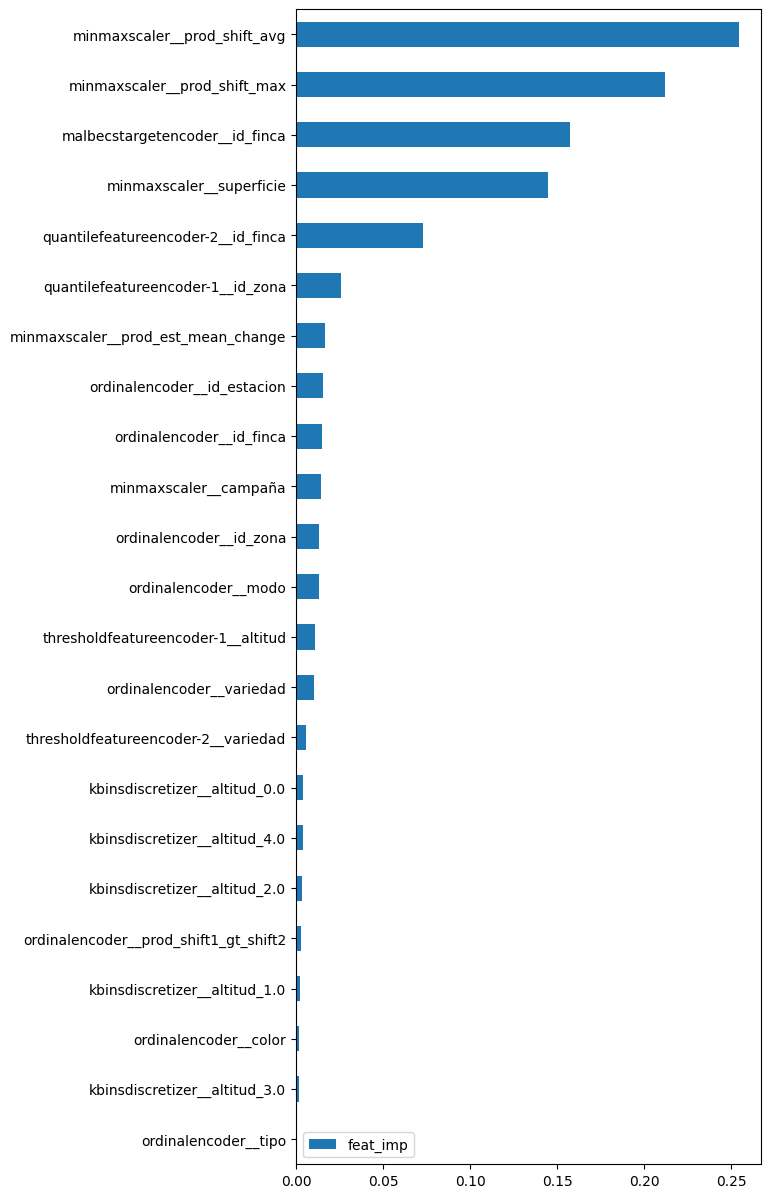

In [93]:
show_feat_imps(
    m[-1].feature_importances_,
    m[:-1].get_feature_names_out(),
)

Shap values

In [74]:
import shap
shap.initjs()

In [75]:
explainer = shap.TreeExplainer(m[-1])

In [77]:
x_sample = X.sample(int(0.8*X.shape[0]))
x_sample_trans = pd.DataFrame(
    m[:-1].transform(x_sample),
    columns=m[:-1].get_feature_names_out(),
)

In [78]:
shap_values = explainer.shap_values(x_sample_trans)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


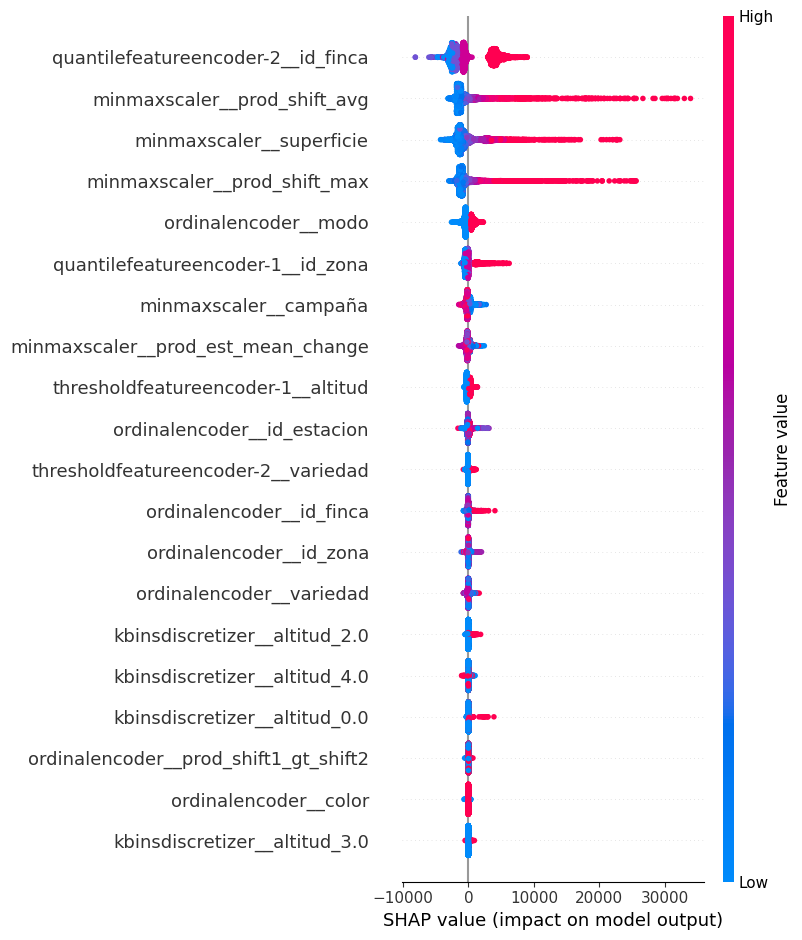

In [79]:
shap.summary_plot(shap_values, x_sample_trans)

# 7. Prediccion Final

In [81]:
y_pred_final = m.predict(X_final)
preds_final = data_final[['id_finca', 'variedad','modo','tipo','color','superficie']].copy()
preds_final['produccion'] = y_pred_final
preds_final = preds_final.sort_values(['id_finca', 'variedad','modo','tipo','color','superficie'], ascending=True)

In [84]:
preds_final.to_csv('../data/final/Malbecs_final.txt', sep="|", header=None)